In [1]:
!pip install yfinance
!pip install ta

In [2]:
import matplotlib as mpl
from matplotlib import cycler
import matplotlib.pyplot as plt


colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Import the data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
import ta

warnings.filterwarnings("ignore")

# Option sûre pour le style
plt.style.use('seaborn-v0_8')  # ou remplace par un style présent dans plt.style.available


In [9]:
# Import some data
df = yf.download("GOOG")
df.columns

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

**Important**: The column names are different between the import using Yahoo Finance API or the import usinh MetaTrader5. Thus, to eliminate this problem, we will rename the necessary columns always with the same name. Here, we only need the Ajusted Close columns

In [11]:
# Rename the columns
df = df[["Close"]]
df.columns = ["close"]
df

,close
Date,
2004-08-19,2.484365
2004-08-20,2.681699
2004-08-23,2.708686
2004-08-24,2.596526
2004-08-25,2.624504
...,...
2025-06-10,180.009995
2025-06-11,178.789993
2025-06-12,176.970001


# Simple Moving Average (SMA)

In [14]:
# Simple moving average
df["SMA 15"] = df[["close"]].rolling(15).mean().shift(1)
df["SMA 60"] = df[["close"]].rolling(60).mean().shift(1)


<Axes: xlabel='Date'>

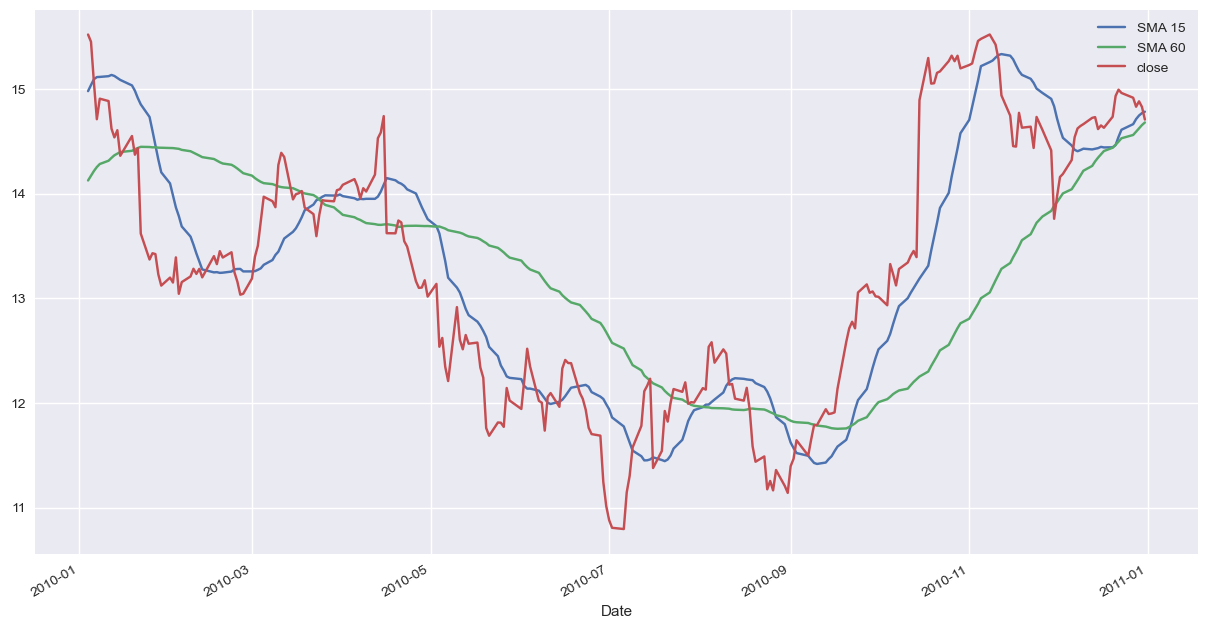

In [16]:
df[["SMA 15", "SMA 60", "close"]].loc["2010"].plot(figsize=(15,8))

# Moving Standard Deviation (MSD)

In [19]:
# Volatility of returns
df["returns"] = df["close"].pct_change(1)
df["MSD 15"] = df[["returns"]].rolling(15).std().shift(1)
df["MSD 60"] = df[["returns"]].rolling(60).std().shift(1)

<Axes: xlabel='Date'>

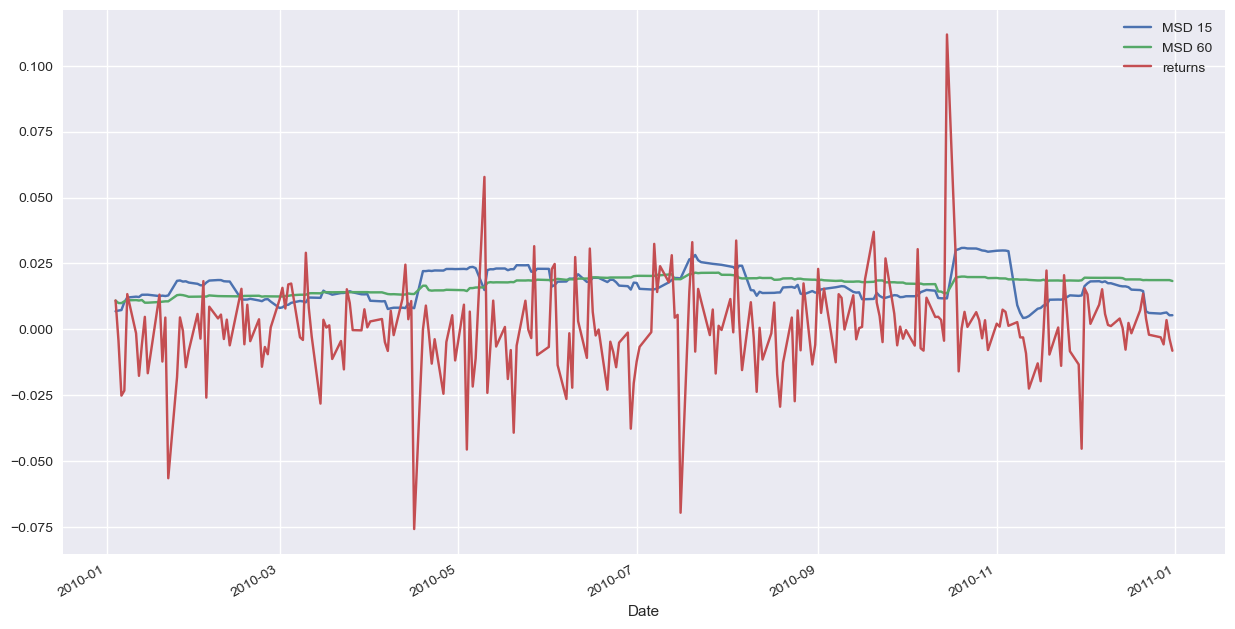

In [21]:
df[["MSD 15", "MSD 60", "returns"]].loc["2010"].plot(figsize=(15,8))

# Technical Analysis (ta) library

In [24]:
# Import ta library
import ta
RSI = ta.momentum.RSIIndicator(df["close"], window=14, fillna=False)
RSI

In [26]:
df["rsi"] = RSI.rsi()

<Axes: xlabel='Date'>

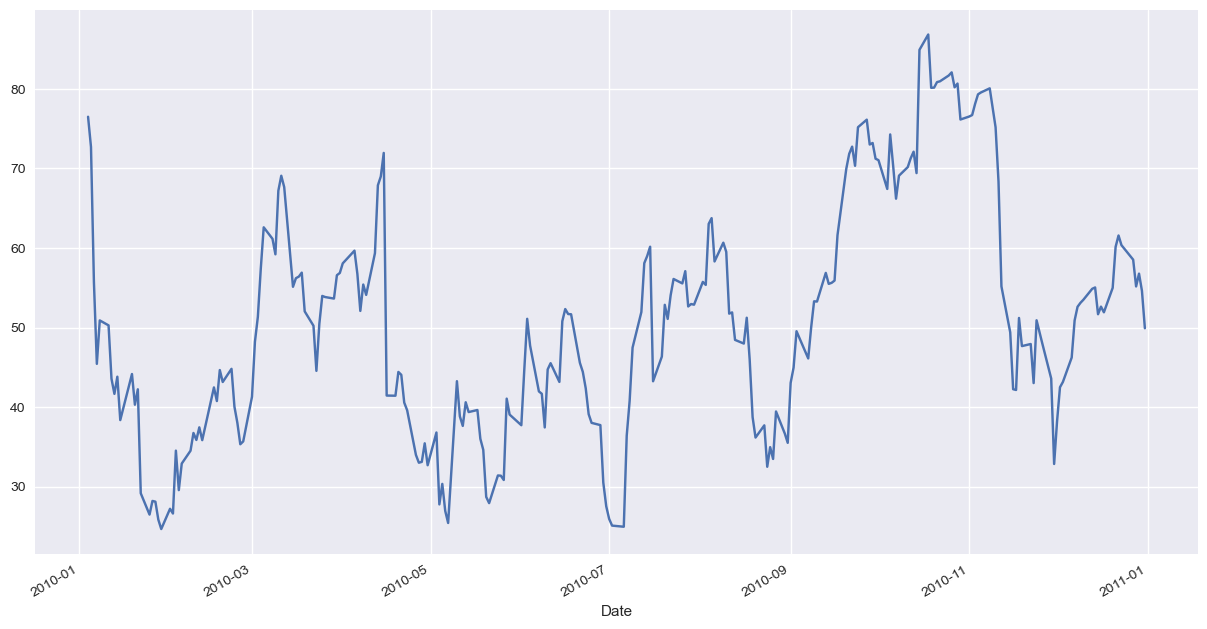

In [28]:
df["rsi"].loc["2010"].plot(figsize=(15,8))

# CREATE A FUNCTION

In [31]:
def feature_engineering(df):
    """ Create new variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.copy()
    
    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi()
    
    return df_copy

In [36]:
df = yf.download("GOOG")
df = df[["Close"]]
df.columns = ["close"]

[*********************100%***********************]  1 of 1 completed


In [38]:
feature_engineering(df)

,close,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
Date,,,,,,,
2004-08-19,2.484366,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.681699,0.079430,NaN,NaN,NaN,NaN,NaN
2004-08-23,2.708686,0.010064,NaN,NaN,NaN,NaN,NaN
2004-08-24,2.596526,-0.041408,NaN,NaN,NaN,NaN,NaN
2004-08-25,2.624504,0.010775,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-06-10,180.009995,0.013399,170.996697,162.846483,0.015606,0.021217,66.808345
2025-06-11,178.789993,-0.006777,171.819466,163.056337,0.014171,0.021181,64.414716
2025-06-12,176.970001,-0.010179,172.730697,163.263336,0.014393,0.021241,60.908809
